# Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

Откуда брать данные?

Можете взять свои рабочие данные, либо найти открытые данные (например, на kaggle.com) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:

данные приложений из Google Play;
данные о видео из трендов YouTube;
данные об уровне счастья в разных странах;
данные по фильмам и сериалам Netflix.

In [1]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
spotify = pd.read_csv('top2018.csv')
spotify.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440.0,4.0
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925.0,4.0


In [3]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                100 non-null    object 
 1   name              100 non-null    object 
 2   artists           100 non-null    object 
 3   danceability      100 non-null    float64
 4   energy            100 non-null    float64
 5   key               100 non-null    float64
 6   loudness          100 non-null    float64
 7   mode              100 non-null    float64
 8   speechiness       100 non-null    float64
 9   acousticness      100 non-null    float64
 10  instrumentalness  100 non-null    float64
 11  liveness          100 non-null    float64
 12  valence           100 non-null    float64
 13  tempo             100 non-null    float64
 14  duration_ms       100 non-null    float64
 15  time_signature    100 non-null    float64
dtypes: float64(13), object(3)
memory usage: 12.6+

In [11]:
df_spotify= spotify[['name','artists','danceability','energy','loudness','tempo']]
df_spotify.head()

,name,artists,danceability,energy,loudness,tempo
0,God's Plan,Drake,0.754,0.449,-9.211,77.169
1,SAD!,XXXTENTACION,0.740,0.613,-4.880,75.023
2,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,-6.090,159.847
3,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,-8.011,140.124
4,In My Feelings,Drake,0.835,0.626,-5.833,91.030


# Самые танцевальные треки по рейтингу Spotify 2018

Танцевальность оценивает, насколько трек подходит для танцев на основе комбинации музыкальных элементов.

In [5]:
spotify_barh = df_spotify.sort_values('danceability', ascending=True).head(10)

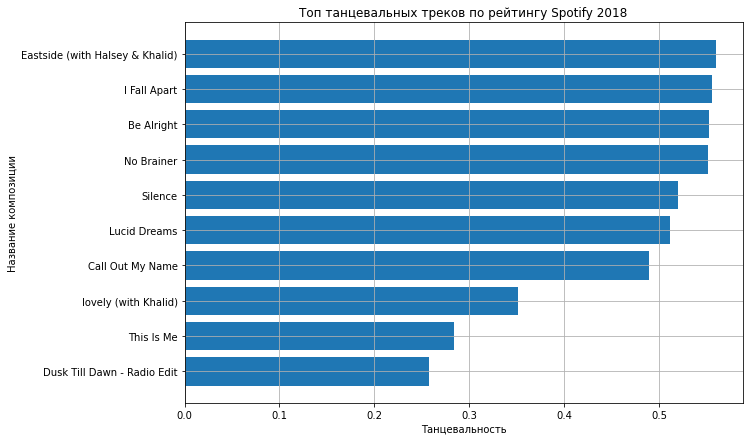

In [6]:
plt.barh(spotify_barh['name'], spotify_barh['danceability'])
plt.xlabel('Танцевальность')
plt.ylabel('Название композиции')
plt.title('Топ танцевальных треков по рейтингу Spotify 2018')
plt.grid()

Наиболее танцевальными в 2018 году оказались треки Eatside (with Halsey & Khalid), I Fall Apart, Be Alright, No Brainer.

# Влияние темпа трека на оценку его танцевальности

Построим распределение, которое опишет влияние темпа трека на оценку его танцевальности.

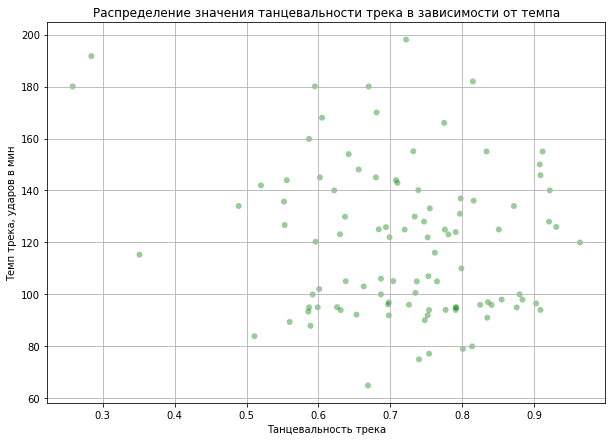

In [7]:
tempo = df_spotify.tempo 
danceability = df_spotify.danceability
fig, ax = plt.subplots()
ax.scatter(danceability, tempo, c='green', alpha=0.4, edgecolors='none')
ax.grid(True)
plt.xlabel('Танцевальность трека')
plt.ylabel('Темп трека, ударов в мин')
plt.title('Распределение значения танцевальности трека в зависимости от темпа')
plt.show()

Как видно из распределения, темп трека не влияет на его оценку танцевальности. Высокое значение танцевальности может иметь как трек с высоким темпом, так и с низким, но в среднем диапазон темпа наиболее танцевальных композиций составляет от 90 до 160 ударов в минуту.

# Средний темп треков, вошедших в топ Spotify 2018

Посмотрим на общий оценочный темп трека в ударах в минуту.

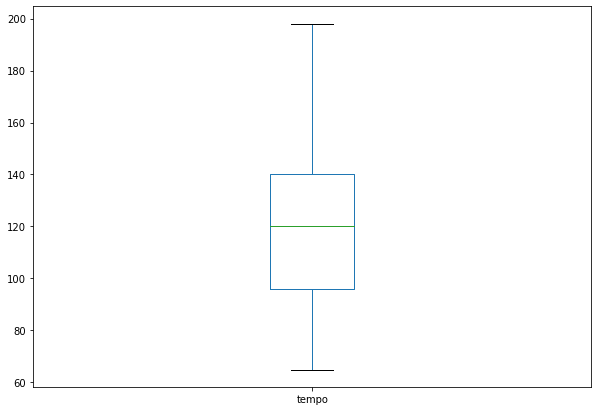

In [8]:
df_spotify['tempo'].plot(kind='box')

Большая часть треков имеет темп 120 ударов в минуту, размах примерно от 100 до 140 ударов в минуту.

# Cравение оценки энергичности треков для разных исполнителей  

Энергичность оценивается по шкале от 0,0 до 1,0 и представляет собой меру интенсивности и активности трека. 

In [9]:
import seaborn as sns

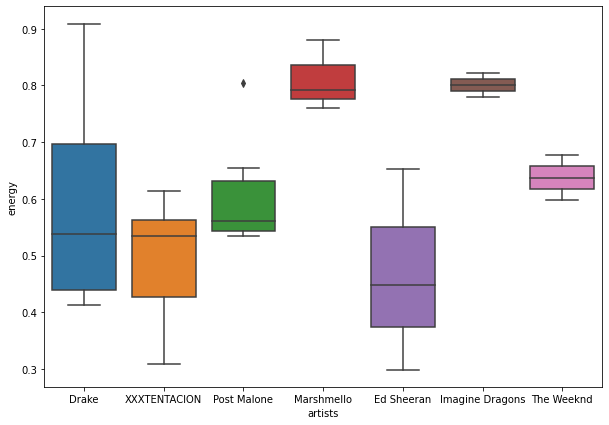

In [10]:
energy_art = spotify.artists.value_counts().sort_values(ascending = False).head(7).index.values
energy_art
ax = sns.boxplot(x="artists", y="energy", 
            data=spotify[spotify.artists.isin(energy_art)])

Как видим, треки некоторых исполнителей имеют очень узкий коридор значений энергичности их композиций (Clean Bandit, Marshmello artists, Ozuna, Post Malone), а некоторые (Drake, XXXTANTACION, Ed Sheeran) имеют большой размах энергичности треков.